## Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Import the file

In [2]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

### Create the headers of the dataframe

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

### Read the file from web location

In [4]:
df = pd.read_csv(path, names = headers)

### Check the dataframe

In [5]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Identify and handle missing values

In the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function:

.replace(A, B, inplace = True) 

to replace A by B. 

In [7]:
import numpy as np
df.replace("?", np.nan, inplace=True )

## Identify and handle missing values

In [10]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###  Count missing values in each column

Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

## Deal with missing data¶
How to deal with missing data?

    Drop data
    a. Drop the whole row
    b. Drop the whole column
    Replace data
    a. Replace it by mean
    b. Replace it by frequency
    c. Replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

Replace by mean:

### Calculate the mean value

In [13]:
avg_norm_loss = df["normalized-losses"].astype(float).mean()
print("Average of Normalised-Loses", avg_norm_loss)

Average of Normalised-Loses 122.0


### Replace NAN with the average value

In [14]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace = True)

### Calculate the mean value of the bore column

In [15]:
avg_bore = df["bore"].astype(float).mean()

### Replece NAN with the mean of the column

In [16]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [20]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Calculate The average Value of stroke variable

In [21]:
stroke_avg = df["stroke"].astype(float).mean()
print("Stroke Average Value", stroke_avg)
df["stroke"].replace(np.nan, stroke_avg, inplace = True)

Stroke Average Value 3.2554228855721337


### Calculate the average Value of horsepower variable

In [22]:
horsepower_avg = df["horsepower"].astype(float).mean()
print("Horsepower Average Value", horsepower_avg)
df.horsepower.replace(np.nan, horsepower_avg, inplace=True)

Horsepower Average Value 104.25615763546799


### Calculate the average value of peak-rpm variable

In [23]:
peak_rpm_avg = df["peak-rpm"].astype(float).mean(axis=0)
print("Average value of peak-rpm", peak_rpm_avg)
df["peak-rpm"].replace(np.nan, peak_rpm_avg, inplace=True)

Average value of peak-rpm 5125.369458128079


## To see values present in a certain column

In [24]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

#### Calculate the most common value in a column

In [25]:
df["num-of-doors"].value_counts().idxmax()

'four'

#### Replace the missing nr-of-doors with the frequency

In [26]:
df["num-of-doors"].replace(np.nan, "four", inplace = True)

### Drop all rows that do not have any data

In [29]:
df.dropna(subset=["price"], axis = 0, inplace = True)
# rest index because we droped 2 rows
df.reset_index(drop=True, inplace = True)

In [30]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Correct data format
.dtype()
.astype()

In [32]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Convert data types to correct format type

In [37]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("float")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype(float)

In [38]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data Standardisation -Normalisation

In [39]:
df['city-L/100km'] = 235/df['city-mpg']

In [40]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0,12.368421
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0,13.055556
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0,9.038462


In [42]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns = {"highway-mpg":"highway-l/10km"}, inplace = True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-l/10km,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30.0,13950.0,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22.0,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400.0,23,28.0,16845.0,10.217391
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300.0,19,25.0,19045.0,12.368421
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500.0,18,23.0,21485.0,13.055556
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800.0,26,27.0,22470.0,9.038462


### Demonstrate Normalisation

In [48]:
df.length = df.length/df.length.max()
df.width = df.width/df.width.max()
df.height = df.height/df.height.max()

In [50]:
df.horsepower = df.horsepower.astype(int, copy = True)

### Load graphic specific libraries

In [52]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

### Create Histogram

(array([44., 45., 48., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <BarContainer object of 10 artists>)

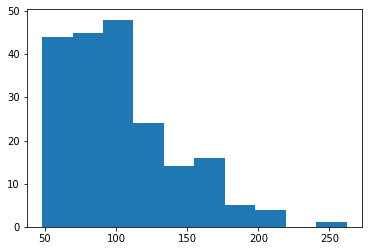

In [53]:
plt.pyplot.hist(df.horsepower)

### Create bins

In [54]:
bins = np.linspace(min(df.horsepower), max(df.horsepower), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

### Set grouping names

In [55]:
group_names = ["Low","Medium","High"]

### Cut function application to determine to which value the horsepower apply to

In [58]:
df["horsepower_binned"]= pd.cut(df.horsepower, bins, labels=group_names, include_lowest = True)

In [60]:
df[["horsepower", "horsepower_binned"]].head(20)

,horsepower,horsepower_binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


### Draw visualisations of bins 

(array([153.,  43.,   5.]),
 array([ 48.        , 119.33333333, 190.66666667, 262.        ]),
 <BarContainer object of 3 artists>)

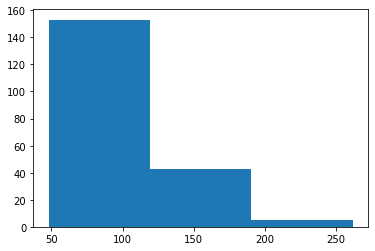

In [62]:
plt.pyplot.hist(df.horsepower, bins =3)

### Set x/y labels and plot title

(array([153.,  43.,   5.]),
 array([ 48.        , 119.33333333, 190.66666667, 262.        ]),
 <BarContainer object of 3 artists>)

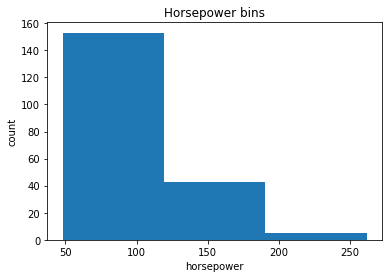

In [64]:
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower bins")
plt.pyplot.hist(df.horsepower, bins =3)

## Create Dummy Variable - Indicator Variable

##### Use Dummy variables for asigning numerical values to categories in order to perform regression analysis

In [65]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-l/10km', 'price', 'city-L/100km', 'horsepower_binned'],
      dtype='object')

In [69]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head(20)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


### Change the column names for clarity

In [72]:
dummy_variable_1.rename(columns = {'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### Merge the data

In [87]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-l/10km', 'price',
       'city-L/100km', 'horsepower_binned', 'fuel-type-diesel',
       'fuel-type-gas'],
      dtype='object')

### Drop the column fuel-type

In [80]:
# df.drop("fuel-type", axis=1, inplace = True)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,highway-l/10km,price,city-L/100km,horsepower_binned,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,1.0,...,27.0,13495.0,11.190476,Low,0,1,0,1,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,1.0,...,27.0,16500.0,11.190476,Low,0,1,0,1,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,1.0,...,26.0,16500.0,12.368421,Medium,0,1,0,1,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,1.0,...,30.0,13950.0,9.791667,Low,0,1,0,1,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,1.0,...,22.0,17450.0,13.055556,Low,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,1.0,...,28.0,16845.0,10.217391,Low,0,1,0,1,0,1
197,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,1.0,...,25.0,19045.0,12.368421,Medium,0,1,0,1,0,1
198,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,1.0,...,23.0,21485.0,13.055556,Medium,0,1,0,1,0,1
199,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,1.0,...,27.0,22470.0,9.038462,Low,1,0,1,0,1,0


In [85]:
# df.drop(['fuel-type-diesel', 'fuel-type-gas','fuel-type-diesel', 'fuel-type-gas'], axis =1, inplace = True)

KeyError: "['fuel-type-diesel' 'fuel-type-gas' 'fuel-type-diesel' 'fuel-type-gas'] not found in axis"

In [88]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-l/10km,price,city-L/100km,horsepower_binned,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,1.0,...,9.0,111,5000.0,21,27.0,13495.0,11.190476,Low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,1.0,...,9.0,111,5000.0,21,27.0,16500.0,11.190476,Low,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,1.0,...,9.0,154,5000.0,19,26.0,16500.0,12.368421,Medium,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,1.0,...,10.0,102,5500.0,24,30.0,13950.0,9.791667,Low,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,1.0,...,8.0,115,5500.0,18,22.0,17450.0,13.055556,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,1.0,...,9.5,114,5400.0,23,28.0,16845.0,10.217391,Low,0,1
197,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,1.0,...,8.7,160,5300.0,19,25.0,19045.0,12.368421,Medium,0,1
198,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,1.0,...,8.8,134,5500.0,18,23.0,21485.0,13.055556,Medium,0,1
199,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,1.0,...,23.0,106,4800.0,26,27.0,22470.0,9.038462,Low,1,0


In [90]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [92]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
196,1,0
197,0,1
198,1,0
199,0,1


In [94]:
dummy_variable_2.rename(columns = {"std":"aspiration-std", "turbo":"aspiration-turbo"},inplace = True)
dummy_variable_2

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
196,1,0
197,0,1
198,1,0
199,0,1


In [95]:
df1 = pd.concat([df, dummy_variable_2], axis = 1)
df1.drop("aspiration", axis = 1, inplace=True)
df1

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-l/10km,price,city-L/100km,horsepower_binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,1.0,1.0,...,5000.0,21,27.0,13495.0,11.190476,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,1.0,1.0,...,5000.0,21,27.0,16500.0,11.190476,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,1.0,1.0,...,5000.0,19,26.0,16500.0,12.368421,Medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,1.0,1.0,...,5500.0,24,30.0,13950.0,9.791667,Low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,1.0,1.0,...,5500.0,18,22.0,17450.0,13.055556,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,four,sedan,rwd,front,109.1,1.0,1.0,...,5400.0,23,28.0,16845.0,10.217391,Low,0,1,1,0
197,-1,95.0,volvo,four,sedan,rwd,front,109.1,1.0,1.0,...,5300.0,19,25.0,19045.0,12.368421,Medium,0,1,0,1
198,-1,95.0,volvo,four,sedan,rwd,front,109.1,1.0,1.0,...,5500.0,18,23.0,21485.0,13.055556,Medium,0,1,1,0
199,-1,95.0,volvo,four,sedan,rwd,front,109.1,1.0,1.0,...,4800.0,26,27.0,22470.0,9.038462,Low,1,0,0,1


## Save the dataframe newly formed

In [ ]:
df1.to_csv("clean_df.csv")